In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance, ks_2samp

import matplotlib.pyplot as plt

def view_single_distribution(
    df,
    metric="area",
    bins=50,
    density=True,
    ax=None,
    title_prefix=""
):
    """
    View a histogram of a single metric from a DataFrame containing
    columns like: ['video', 'frame', 'area', 'eccentricity', 'solidity', 'perimeter'].

    Args:
        df (pd.DataFrame): The input DataFrame.
        metric (str): Which column to visualize, e.g. 'area', 'eccentricity', 'solidity', 'perimeter'.
        bins (int): Number of histogram bins.
        density (bool): Whether to normalize the histogram (density=True) or show counts (density=False).
        ax (matplotlib.axes.Axes, optional): Matplotlib Axes to plot on. 
            If None, a new figure/axes is created.
        title_prefix (str, optional): An optional prefix added to the plot title (e.g. "Real" or "Generated").

    Returns:
        matplotlib.axes.Axes: The axes on which the histogram was plotted.
    """
    if metric not in df.columns:
        raise ValueError(
            f"Metric '{metric}' not found in DataFrame columns. "
            f"Available columns: {df.columns.tolist()}"
        )

    # Drop any NaN or invalid values
    values = df[metric].dropna()

    # Create new figure/axes if none provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Plot histogram
    ax.hist(values, bins=bins, alpha=0.7, edgecolor="black", density=density)
    ax.set_title(f"{title_prefix} {metric.capitalize()} Distribution")
    ax.set_xlabel(metric)
    ax.set_ylabel("Density" if density else "Count")

    return ax

def compare_distributions_wasserstein(df_real, df_gen, metric):
    """Compute Wasserstein distance for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    return wasserstein_distance(real_values, gen_values)

def compare_distributions_ks(df_real, df_gen, metric):
    """Compute KS statistic for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    ks_stat, ks_pval = ks_2samp(real_values, gen_values)
    return ks_stat, ks_pval

def plot_overlaid_histograms(df_real, df_gen, metric, ax, bins=50):
    """Plot two overlaid histograms for the given metric."""
    real_values = df_real[metric].dropna()
    gen_values  = df_gen[metric].dropna()
    ax.hist(real_values, bins=bins, alpha=0.5, label="Real", density=True)
    ax.hist(gen_values,  bins=bins, alpha=0.5, label="Generated", density=True)
    ax.set_xlabel(metric)
    ax.set_ylabel("Density")
    ax.legend()

In [19]:
dfs = {
    "real": pd.read_csv("../results/checkpoint-900-val-old/all_morphology.csv"),
    "r64_150": pd.read_csv("../results/i2v_r64_150/all_morphology.csv"),
    "r64_250": pd.read_csv("../results/i2v_r64_250/all_morphology.csv"),
    "r64_500": pd.read_csv("../results/i2v_r64_500/all_morphology.csv"),
    "r64_750": pd.read_csv("../results/i2v_r64_750/all_morphology.csv"),
    "r64_900": pd.read_csv("../results/i2v_r64_900/all_morphology.csv"),
    "r128_250": pd.read_csv("../results/i2v_r128_250/all_morphology.csv"),
    "r128_500": pd.read_csv("../results/i2v_r128_500/all_morphology.csv"),
    "r128_750": pd.read_csv("../results/i2v_r128_750/all_morphology.csv"),
    "r128_900": pd.read_csv("../results/i2v_r128_900/all_morphology.csv"),
    "r256_150": pd.read_csv("../results/i2v_r256_150/all_morphology.csv"),
    "r256_250": pd.read_csv("../results/i2v_r256_250/all_morphology.csv"),
    "r256_375": pd.read_csv("../results/i2v_r256_375/all_morphology.csv"),
    "r256_750": pd.read_csv("../results/i2v_r256_750/all_morphology.csv"),
    "r256_900": pd.read_csv("../results/i2v_r256_900/all_morphology.csv"),
}

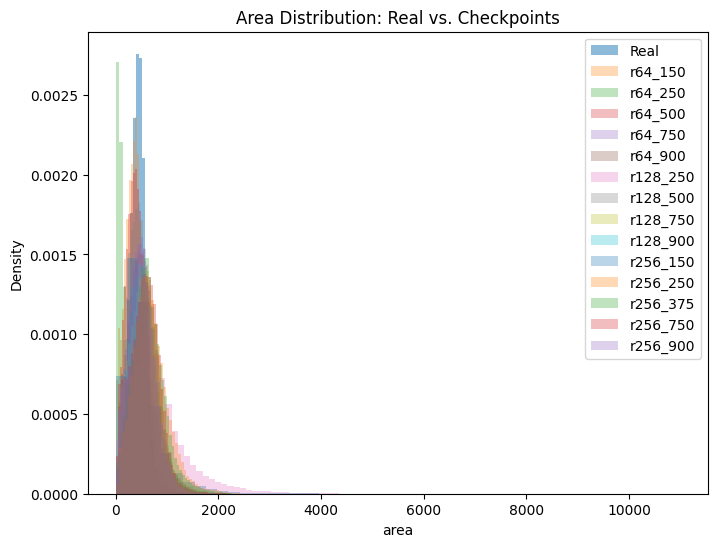

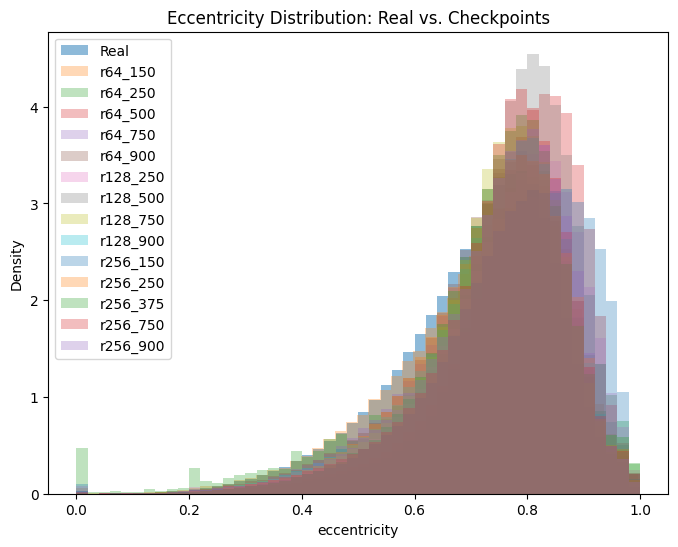

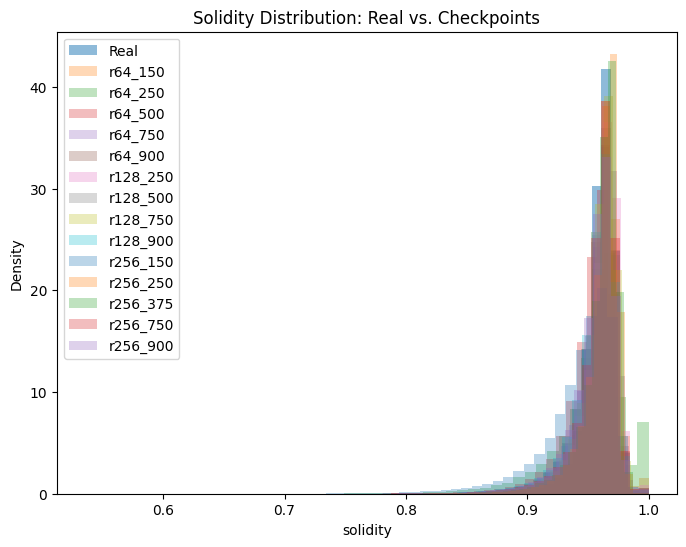

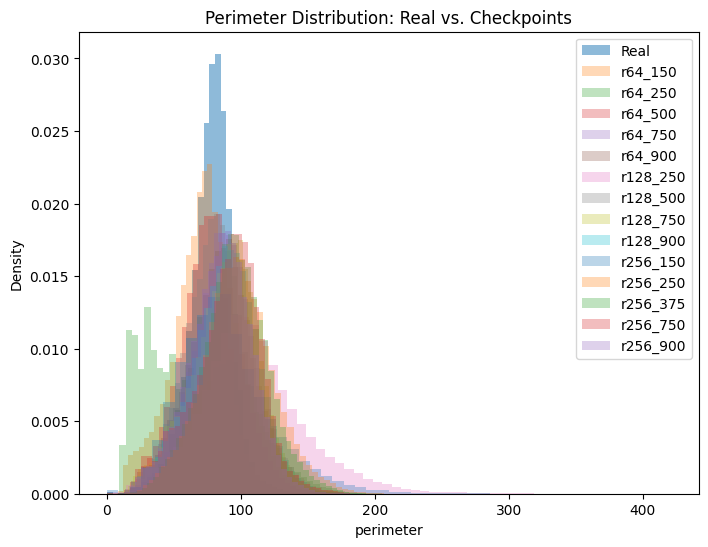

In [20]:
import matplotlib.pyplot as plt

metrics = ["area", "eccentricity", "solidity", "perimeter"]

for metric in metrics:
    plt.figure(figsize=(8,6))
    # Plot real distribution
    plt.hist(dfs["real"][metric].dropna(), bins=50, alpha=0.5, density=True, label="Real")
    
    # Plot each checkpoint overlayed
    for name, df in dfs.items():
        if name == "real":
            continue
        plt.hist(df[metric].dropna(), bins=50, alpha=0.3, density=True, label=name)
    
    plt.title(f"{metric.capitalize()} Distribution: Real vs. Checkpoints")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [21]:
import pandas as pd
from scipy.stats import wasserstein_distance, ks_2samp

metrics = ["area", "eccentricity", "solidity", "perimeter"]
results = []

for checkpoint_name, df_gen in dfs.items():
    if checkpoint_name == "real":
        continue
    for metric in metrics:
        real_vals = dfs["real"][metric].dropna()
        gen_vals  = df_gen[metric].dropna()
        
        wdist  = wasserstein_distance(real_vals, gen_vals)
        ks_stat, ks_pval = ks_2samp(real_vals, gen_vals)
        
        results.append({
            "checkpoint": checkpoint_name,
            "metric": metric,
            "wasserstein_distance": wdist,
            "ks_stat": ks_stat,
            "ks_pval": ks_pval
        })

df_results = pd.DataFrame(results)
df_results

,checkpoint,metric,wasserstein_distance,ks_stat,ks_pval
0,r64_150,area,80.424267,0.216229,0.000000e+00
1,r64_150,eccentricity,0.010261,0.052769,0.000000e+00
2,r64_150,solidity,0.002197,0.042507,6.988453e-313
3,r64_150,perimeter,9.196728,0.219347,0.000000e+00
4,r64_250,area,177.271038,0.349018,0.000000e+00
5,r64_250,eccentricity,0.031937,0.092518,0.000000e+00
6,r64_250,solidity,0.011955,0.185028,0.000000e+00
7,r64_250,perimeter,20.649430,0.336855,0.000000e+00
8,r64_500,area,50.289329,0.131479,0.000000e+00
9,r64_500,eccentricity,0.073827,0.246757,0.000000e+00


In [22]:
mean_dists = (
    df_results
    .groupby("checkpoint")["wasserstein_distance"]
    .mean()
    .sort_values()
)
print(mean_dists)

# The top row(s) in this sorted output have the smallest distance on average,
# indicating the best morphological match to real data.

checkpoint
r64_500      13.972709
r128_500     15.963300
r64_150      22.408363
r256_900     25.033304
r64_900      29.638977
r64_750      30.923452
r128_900     32.803290
r128_750     35.588394
r256_150     39.161994
r256_750     40.769088
r64_250      49.491090
r256_375     57.114766
r256_250     67.183605
r128_250    106.732771
Name: wasserstein_distance, dtype: float64


In [23]:
############################################################
# 1) LOAD PROLIFERATION DATAFRAMES
############################################################
dfs_prolif = {
    "real": pd.read_csv("../results/checkpoint-900-val-old/proliferation_metrics.csv"),
    "r64_150": pd.read_csv("../results/i2v_r64_150/proliferation_metrics.csv"),
    "r64_250": pd.read_csv("../results/i2v_r64_250/proliferation_metrics.csv"),
    "r64_500": pd.read_csv("../results/i2v_r64_500/proliferation_metrics.csv"),
    "r64_750": pd.read_csv("../results/i2v_r64_750/proliferation_metrics.csv"),
    "r64_900": pd.read_csv("../results/i2v_r64_900/proliferation_metrics.csv"),
    "r128_250": pd.read_csv("../results/i2v_r128_250/proliferation_metrics.csv"),
    "r128_500": pd.read_csv("../results/i2v_r128_500/proliferation_metrics.csv"),
    "r128_750": pd.read_csv("../results/i2v_r128_750/proliferation_metrics.csv"),
    "r128_900": pd.read_csv("../results/i2v_r128_900/proliferation_metrics.csv"),
    "r256_150": pd.read_csv("../results/i2v_r256_150/proliferation_metrics.csv"),
    "r256_250": pd.read_csv("../results/i2v_r256_250/proliferation_metrics.csv"),
    "r256_375": pd.read_csv("../results/i2v_r256_375/proliferation_metrics.csv"),
    "r256_750": pd.read_csv("../results/i2v_r256_750/proliferation_metrics.csv"),
    "r256_900": pd.read_csv("../results/i2v_r256_900/proliferation_metrics.csv"),
}

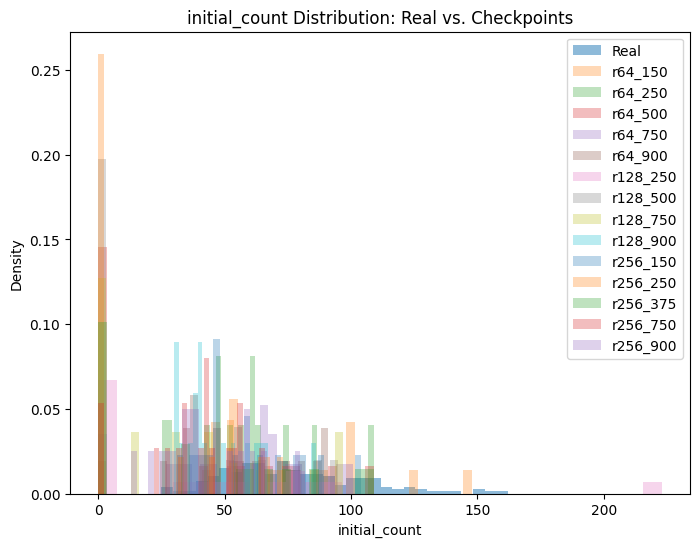

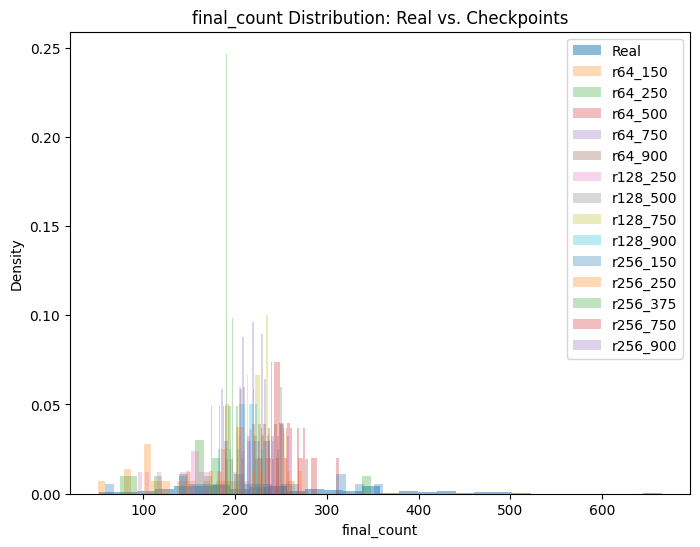

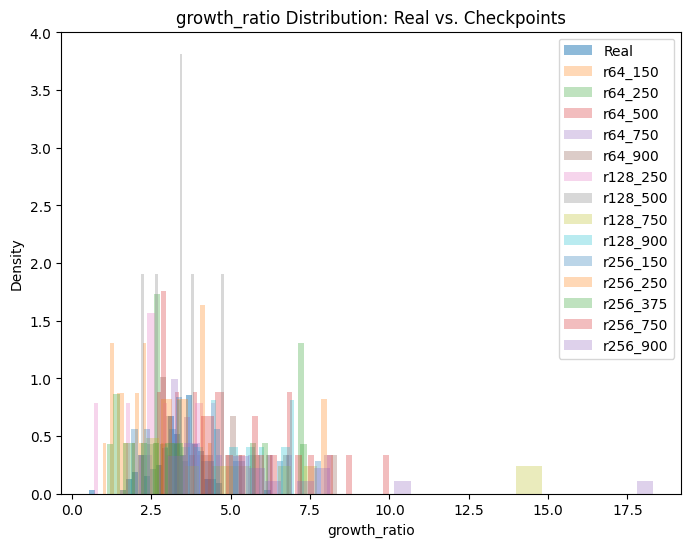

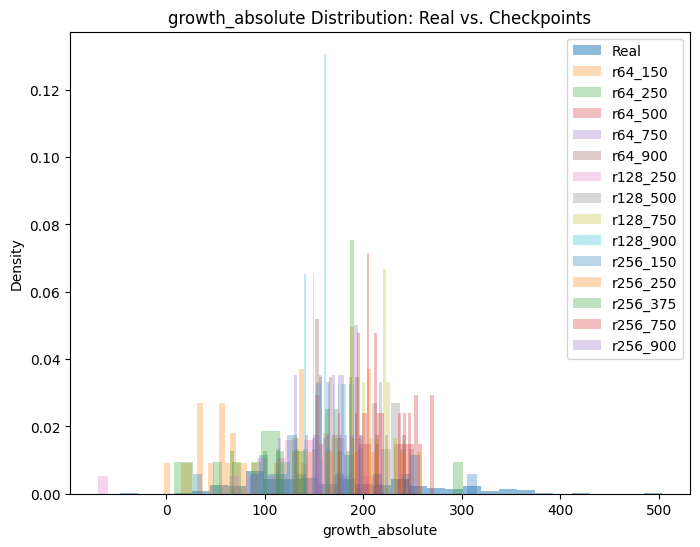

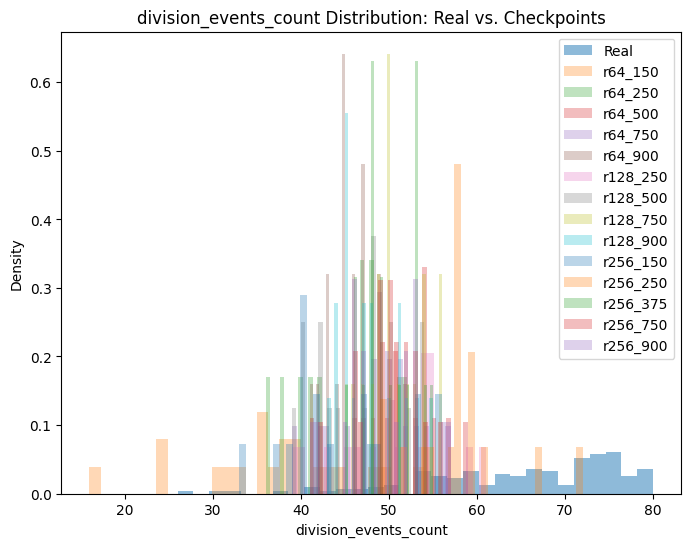

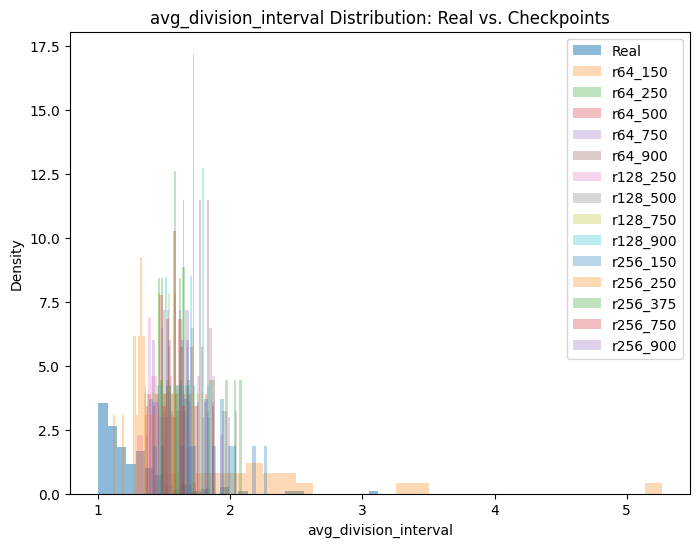

In [24]:
# List of columns in proliferation_metrics.csv that we want to compare
prolif_metrics = [
    "initial_count",
    "final_count",
    "growth_ratio",
    "growth_absolute",
    "division_events_count",
    "avg_division_interval"
]

############################################################
# 2) PLOT OVERLAID HISTOGRAMS FOR EACH PROLIFERATION METRIC
############################################################
import matplotlib.pyplot as plt

for metric in prolif_metrics:
    plt.figure(figsize=(8,6))
    # Plot real distribution
    real_vals = dfs_prolif["real"][metric].dropna()
    plt.hist(real_vals, bins=30, alpha=0.5, density=True, label="Real")

    # Plot each checkpoint overlay
    for name, df in dfs_prolif.items():
        if name == "real":
            continue
        gen_vals = df[metric].dropna()
        plt.hist(gen_vals, bins=30, alpha=0.3, density=True, label=name)

    plt.title(f"{metric} Distribution: Real vs. Checkpoints")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [25]:
############################################################
# 3) COMPUTE DISTRIBUTION DISTANCES (E.G. WASSERSTEIN, KS)
############################################################
from scipy.stats import wasserstein_distance, ks_2samp
results = []

for checkpoint_name, df_gen in dfs_prolif.items():
    if checkpoint_name == "real":
        continue  # skip comparing real with itself
    for metric in prolif_metrics:
        real_vals = dfs_prolif["real"][metric].dropna()
        gen_vals  = df_gen[metric].dropna()
        
        if len(real_vals) == 0 or len(gen_vals) == 0:
            # If no data, skip
            continue

        # Compute Wasserstein and KS
        wdist  = wasserstein_distance(real_vals, gen_vals)
        ks_stat, ks_pval = ks_2samp(real_vals, gen_vals)

        results.append({
            "checkpoint": checkpoint_name,
            "metric": metric,
            "wasserstein_distance": wdist,
            "ks_stat": ks_stat,
            "ks_pval": ks_pval
        })

df_prolif_results = pd.DataFrame(results)
df_prolif_results

############################################################
# 4) RANK CHECKPOINTS BY AVERAGE DISTANCE TO REAL
############################################################
mean_dists = (
    df_prolif_results
    .groupby("checkpoint")["wasserstein_distance"]
    .mean()   # average across the 6 proliferation metrics
    .sort_values()
)
print("Average Wasserstein distance on proliferation metrics:")
print(mean_dists)

Average Wasserstein distance on proliferation metrics:
checkpoint
r256_150    16.806909
r64_750     28.466081
r64_900     28.941059
r256_900    31.527389
r256_250    31.757554
r256_375    31.928458
r128_900    31.976139
r128_250    33.231411
r64_500     33.565056
r128_500    33.650828
r64_250     34.249456
r256_750    34.685754
r128_750    34.820165
r64_150     41.924120
Name: wasserstein_distance, dtype: float64


In [26]:
prolif_metrics = [
    "initial_count",
    "final_count",
    "growth_ratio",
    "growth_absolute",
    "division_events_count",
    "avg_division_interval"
]

for metric in prolif_metrics:
    # Filter rows for this metric
    subdf = df_prolif_results[df_prolif_results["metric"] == metric].copy()
    
    # Sort by wasserstein_distance ascending (lowest distance = best)
    subdf = subdf.sort_values("wasserstein_distance")
    
    print(f"\n=== Ranking for '{metric}' by Wasserstein Distance ===")
    display(subdf[["checkpoint", "metric", "wasserstein_distance"]])


=== Ranking for 'initial_count' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
0,r64_150,initial_count,4.820930
6,r64_250,initial_count,14.497357
54,r256_150,initial_count,19.393411
18,r64_750,initial_count,22.369699
24,r64_900,initial_count,24.487346
48,r128_900,initial_count,30.414083
78,r256_900,initial_count,34.520026
72,r256_750,initial_count,38.781464
66,r256_375,initial_count,39.759792
12,r64_500,initial_count,43.369699



=== Ranking for 'final_count' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
55,r256_150,final_count,37.925065
25,r64_900,final_count,74.226402
13,r64_500,final_count,74.759918
61,r256_250,final_count,75.396573
37,r128_500,final_count,77.154070
79,r256_900,final_count,78.258398
19,r64_750,final_count,79.142955
49,r128_900,final_count,80.480620
43,r128_750,final_count,81.754446
73,r256_750,final_count,82.242818



=== Ranking for 'growth_ratio' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
38,r128_500,growth_ratio,0.254646
32,r128_250,growth_ratio,0.572506
56,r256_150,growth_ratio,0.741496
14,r64_500,growth_ratio,0.754729
62,r256_250,growth_ratio,0.932749
8,r64_250,growth_ratio,0.983912
20,r64_750,growth_ratio,0.995658
2,r64_150,growth_ratio,1.216308
68,r256_375,growth_ratio,1.295289
26,r64_900,growth_ratio,1.381450



=== Ranking for 'growth_absolute' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
57,r256_150,growth_absolute,21.589793
69,r256_375,growth_absolute,44.582925
63,r256_250,growth_absolute,48.674725
33,r128_250,growth_absolute,50.850000
21,r64_750,growth_absolute,51.130301
27,r64_900,growth_absolute,53.009918
39,r128_500,growth_absolute,53.210756
81,r256_900,growth_absolute,56.712532
45,r128_750,growth_absolute,59.481874
51,r128_900,growth_absolute,60.733204



=== Ranking for 'division_events_count' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
64,r256_250,division_events_count,8.772950
16,r64_500,division_events_count,14.932969
34,r128_250,division_events_count,15.054651
46,r128_750,division_events_count,15.481532
76,r256_750,division_events_count,15.484952
70,r256_375,division_events_count,16.186047
82,r256_900,division_events_count,16.419897
22,r64_750,division_events_count,16.781122
52,r128_900,division_events_count,18.138243
40,r128_500,division_events_count,19.292151



=== Ranking for 'avg_division_interval' by Wasserstein Distance ===


,checkpoint,metric,wasserstein_distance
65,r256_250,avg_division_interval,0.166430
35,r128_250,avg_division_interval,0.312471
17,r64_500,avg_division_interval,0.314128
47,r128_750,avg_division_interval,0.332671
71,r256_375,avg_division_interval,0.348287
77,r256_750,avg_division_interval,0.363512
23,r64_750,avg_division_interval,0.376751
83,r256_900,avg_division_interval,0.380745
53,r128_900,avg_division_interval,0.424603
41,r128_500,avg_division_interval,0.480263


In [27]:
# Combine morphological + proliferation results into one big table
df_combined = pd.concat([df_results, df_prolif_results], ignore_index=True)
df_combined

,checkpoint,metric,wasserstein_distance,ks_stat,ks_pval
0,r64_150,area,80.424267,0.216229,0.000000e+00
1,r64_150,eccentricity,0.010261,0.052769,0.000000e+00
2,r64_150,solidity,0.002197,0.042507,6.988453e-313
3,r64_150,perimeter,9.196728,0.219347,0.000000e+00
4,r64_250,area,177.271038,0.349018,0.000000e+00
...,...,...,...,...,...
135,r256_900,final_count,78.258398,0.465116,9.549109e-04
136,r256_900,growth_ratio,2.872737,0.605297,3.272442e-06
137,r256_900,growth_absolute,56.712532,0.366279,1.811956e-02
138,r256_900,division_events_count,16.419897,0.761628,3.788450e-10


In [28]:
# Pivot the combined table
df_wide = df_combined.pivot(
    index="checkpoint",
    columns="metric",
    values="wasserstein_distance"
)

df_wide

metric,area,avg_division_interval,division_events_count,eccentricity,final_count,growth_absolute,growth_ratio,initial_count,perimeter,solidity
checkpoint,,,,,,,,,,
r128_250,395.996057,0.312471,15.054651,0.050223,88.082558,50.850000,0.572506,44.516279,30.880489,0.004315
r128_500,57.776741,0.480263,19.292151,0.070514,77.154070,53.210756,0.254646,51.513081,6.001879,0.004064
r128_750,130.682799,0.332671,15.481532,0.028821,81.754446,59.481874,3.441947,48.428523,11.639101,0.002856
r128_900,120.069780,0.424603,18.138243,0.029539,80.480620,60.733204,1.666081,30.414083,11.108280,0.005561
r256_150,141.770841,0.530192,20.661499,0.064261,37.925065,21.589793,0.741496,19.393411,14.795476,0.017397
r256_250,248.298255,0.166430,8.772950,0.028216,75.396573,48.674725,0.932749,56.601897,20.404897,0.003051
r256_375,210.415802,0.348287,16.186047,0.037767,89.398409,44.582925,1.295289,39.759792,18.002418,0.003075
r256_750,149.481570,0.363512,15.484952,0.039594,82.242818,68.308140,2.933638,38.781464,13.552280,0.002908
r256_900,91.360881,0.380745,16.419897,0.034375,78.258398,56.712532,2.872737,34.520026,8.732857,0.005102


In [29]:
for metric_name in df_wide.columns:
    # Sort by this metric
    subdf = df_wide[[metric_name]].dropna().sort_values(metric_name)
    print(f"\n=== {metric_name} ===")
    print(subdf)


=== area ===
metric            area
checkpoint            
r64_500      50.289329
r128_500     57.776741
r64_150      80.424267
r256_900     91.360881
r64_900     108.973505
r64_750     113.623712
r128_900    120.069780
r128_750    130.682799
r256_150    141.770841
r256_750    149.481570
r64_250     177.271038
r256_375    210.415802
r256_250    248.298255
r128_250    395.996057

=== avg_division_interval ===
metric      avg_division_interval
checkpoint                       
r256_250                 0.166430
r128_250                 0.312471
r64_500                  0.314128
r128_750                 0.332671
r256_375                 0.348287
r256_750                 0.363512
r64_750                  0.376751
r256_900                 0.380745
r128_900                 0.424603
r128_500                 0.480263
r64_900                  0.490621
r64_250                  0.526566
r256_150                 0.530192
r64_150                  1.084229

=== division_events_count ===
metric      

In [30]:
# e.g. compute the average distance across all metrics in df_wide
df_wide["mean_distance"] = df_wide.mean(axis=1)
df_wide_sorted = df_wide.sort_values("mean_distance")
df_wide_sorted

metric,area,avg_division_interval,division_events_count,eccentricity,final_count,growth_absolute,growth_ratio,initial_count,perimeter,solidity,mean_distance
checkpoint,,,,,,,,,,,
r64_500,50.289329,0.314128,14.932969,0.073827,74.759918,67.258892,0.754729,43.369699,5.519073,0.008607,25.728117
r256_150,141.770841,0.530192,20.661499,0.064261,37.925065,21.589793,0.741496,19.393411,14.795476,0.017397,25.748943
r128_500,57.776741,0.480263,19.292151,0.070514,77.154070,53.210756,0.254646,51.513081,6.001879,0.004064,26.575817
r256_900,91.360881,0.380745,16.419897,0.034375,78.258398,56.712532,2.872737,34.520026,8.732857,0.005102,28.929755
r64_900,108.973505,0.490621,20.050616,0.019714,74.226402,53.009918,1.381450,24.487346,9.558448,0.004241,29.220226
r64_750,113.623712,0.376751,16.781122,0.021093,79.142955,51.130301,0.995658,22.369699,10.045084,0.003918,29.449029
r128_900,120.069780,0.424603,18.138243,0.029539,80.480620,60.733204,1.666081,30.414083,11.108280,0.005561,32.306999
r64_150,80.424267,1.084229,28.279070,0.010261,108.923256,107.220930,1.216308,4.820930,9.196728,0.002197,34.117818
r128_750,130.682799,0.332671,15.481532,0.028821,81.754446,59.481874,3.441947,48.428523,11.639101,0.002856,35.127457
